In [1]:
import pickle
import os

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
import h2o
print(h2o.__version__)

3.30.0.1


### データ作成

In [4]:
# kerasよりロードしたものをローカルに保存
'''
from keras.datasets import mnist

with open("mnist.pickle", mode="wb") as f:
    pickle.dump(mnist.load_data(), f)
'''

'\nfrom keras.datasets import mnist\n\nwith open("mnist.pickle", mode="wb") as f:\n    pickle.dump(mnist.load_data(), f)\n'

In [3]:
data_path = os.path.join(os.environ['HOME'], 'Documents/Sample_Data/MNIST/mnist.pickle')

with open(data_path, mode="rb") as f:
    d = pickle.load(f)

In [4]:
(X_train, y_train), (X_test, y_test) = d

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[]

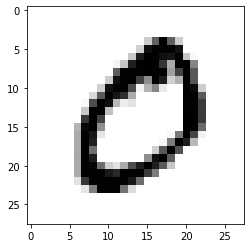

In [11]:
#plt.imshow(X_train[1].reshape(28, 28), cmap=cm.gray_r)
plt.imshow(X_train[1], cmap=cm.gray_r)
plt.plot()

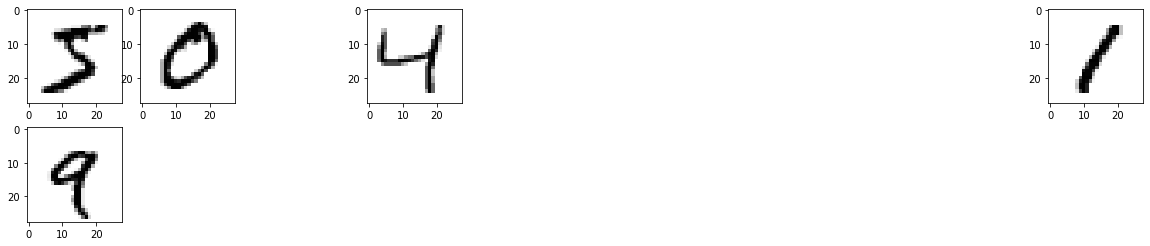

In [32]:
plt.figure(figsize=[20,4])

plt.subplot(2,10,1)
plt.imshow(X_train[0].reshape(28, 28), cmap=cm.gray_r)
plt.subplot(2,10,2)
plt.imshow(X_train[1].reshape(28, 28), cmap=cm.gray_r)
plt.subplot(2,10,4)
plt.imshow(X_train[2].reshape(28, 28), cmap=cm.gray_r)
plt.subplot(2,10,10)
plt.imshow(X_train[3].reshape(28, 28), cmap=cm.gray_r)
plt.subplot(2,10,11)
plt.imshow(X_train[4].reshape(28, 28), cmap=cm.gray_r)

#plt.subplot(2,4,4)
#plt.imshow(X_train[2].reshape(28, 28), cmap=cm.gray_r)

In [7]:
# 3D(n rows*28*28)から2D(n rows*784)へ変形
X_train_reshape = X_train.reshape(60000, 28*28)
print(X_train_reshape.shape)
X_test_reshape = X_test.reshape(10000, 28*28)
print(X_test_reshape.shape)

(60000, 784)
(10000, 784)


In [8]:
# 0~1の間へスケーリングしておく
X_train_reshape = X_train_reshape/255
X_test_reshape = X_test_reshape/255

In [14]:
# 0,1を含まない学習データを作成

# 0,1以外をTrue, 0&1をFalseとするFlag
train_flg = [True if i not in [0,1] else False for i in y_train]

# 0,1以外を抽出した学習データ
X_train_reshape2 = X_train_reshape[train_flg]
X_train_reshape2.shape

(47335, 784)

In [17]:
# テストデータから、異常フラグを作成

# 異常（0&1）：１、正常（0,1以外）：０
y_test_anomaly = [1 if i in [0,1] else 0 for i in y_test]

### モデル作成

#### H2O-3サーバへ接続

In [18]:
h2o.init(url='http://34.229.47.253:54321')

Checking whether there is an H2O instance running at http://34.229.47.253:54321 . connected.


H2O_cluster_uptime:,2 mins 43 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 2 months and 5 days !!!"
H2O_cluster_name:,Puddle
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,49.71 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


#### データのアップロード

In [19]:
# 学習データ（0,1含まないデータ）
frame_train = h2o.H2OFrame(X_train_reshape2)
print(frame_train.shape)
# テストデータ（0,1も含む）
frame_test = h2o.H2OFrame(X_test_reshape)
print(frame_test.shape)

Parse progress: |█████████████████████████████████████████████████████████| 100%
(47335, 784)
Parse progress: |█████████████████████████████████████████████████████████| 100%
(10000, 784)


In [20]:
frame_train.head(5)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0117647,0.0705882,0.0705882,0.0705882,0.494118,0.533333,0.686275,0.101961,0.65098,1,0.968627,0.498039,0,0,0,0,0,0,0,0,0,0,0,0,0.117647,0.141176,0.368627,0.603922,0.666667,0.992157,0.992157,0.992157,0.992157,0.992157,0.882353,0.67451,0.992157,0.94902,0.764706,0.25098,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.262745,0.909804,0.152941,0,0,0,0,0,0,0,0,0,0.243137,0.317647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.470588,0.705882,0.152941,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0509804,0.0980392,0.392157,0.478431,0.027451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129412,0.592157,0.815686,0.988235,0.988235,0.988235,0.572549,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.14902,0.168627,0.411765,1,0.992157,0.992157,0.992157,0.992157,0.992157,0.682353,0.0235294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.168627,0.545098,0.878431,0.886275,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.619608,0.054902,0,0,0,0,0,0,0,0,0


In [59]:
from h2o.estimators import H2OAutoEncoderEstimator

In [60]:
mod_ae = H2OAutoEncoderEstimator(activation = 'tanh')

In [62]:
mod_ae.train(training_frame=frame_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [63]:
mod_ae

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1623209020200_3


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 325,511 weights/biases, 3.8 MB, 497,302 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,711,Input,0,,,,,,,,,
1,,2,200,Tanh,0,0,0,0.157731,0.345563,0,-0.000116092,0.0509603,0.00833792,0.0583447
2,,3,200,Tanh,0,0,0,0.00367596,0.000715744,0,0.000221726,0.0633595,-0.00134838,0.0242269
3,,4,711,Tanh,,0,0,0.0130579,0.0137652,0,-0.000125168,0.0503743,0.0303422,0.0474014




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.006045404357532608
RMSE: 0.07775219840964374

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2021-06-09 04:09:38,1.391 sec,0.00000 obs/sec,0.000000,0,0.0,0.326484,0.106592
1,,2021-06-09 04:10:05,28.356 sec,1561 obs/sec,0.874047,1,41373.0,0.077752,0.006045
2,,2021-06-09 04:10:32,55.480 sec,1560 obs/sec,1.751769,2,82920.0,0.245590,0.060314
3,,2021-06-09 04:10:59,1 min 22.411 sec,1561 obs/sec,2.626027,3,124303.0,0.197500,0.039006
4,,2021-06-09 04:11:28,1 min 51.767 sec,1527 obs/sec,3.501511,4,165744.0,0.152650,0.023302
5,,2021-06-09 04:11:55,2 min 18.741 sec,1534 obs/sec,4.376740,5,207173.0,0.167088,0.027918
6,,2021-06-09 04:12:22,2 min 45.731 sec,1539 obs/sec,5.251400,6,248575.0,0.131374,0.017259
7,,2021-06-09 04:12:49,3 min 12.570 sec,1543 obs/sec,6.126291,7,289988.0,0.159682,0.025498
8,,2021-06-09 04:13:16,3 min 39.622 sec,1546 obs/sec,7.002789,8,331477.0,0.127337,0.016215
9,,2021-06-09 04:13:43,4 min 6.456 sec,1549 obs/sec,7.878927,9,372949.0,0.085750,0.007353



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C683,1.000000,1.000000,0.001716
1,C294,0.999189,0.999189,0.001715
2,C713,0.997597,0.997597,0.001712
3,C187,0.981643,0.981643,0.001685
4,C296,0.980435,0.980435,0.001683
5,C190,0.979125,0.979125,0.001681
6,C712,0.973194,0.973194,0.001670
7,C159,0.970314,0.970314,0.001666
8,C714,0.966141,0.966141,0.001658
9,C268,0.963841,0.963841,0.001654



See the whole table with table.as_data_frame()


In [64]:
# テストデータに対するスコアリング
encoded = mod_ae.predict(frame_test)

# predictを実行すると、出力層からのアウトプット（入力値の再現）となる
encoded.shape

deeplearning prediction progress: |███████████████████████████████████████| 100%


(10000, 711)

In [66]:
# テストデータに対するスコアリング。異常値スコア（MSE）を取得
score_ae = dl_model.anomaly(frame_test)
score_ae.head()

Reconstruction.MSE
0.00374973
0.00930078
0.00366314
0.00587697
0.00460482
0.0033758
0.00396493
0.00887274
0.00803243
0.0064605


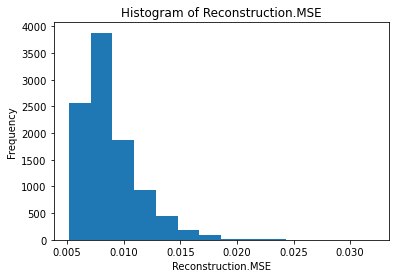

In [67]:
score_ae.hist()

In [68]:
score_ae.quantile()

Probs,Reconstruction.MSEQuantiles
0.01,0.0029367
0.1,0.00356752
0.25,0.00417168
0.333,0.00449456
0.5,0.00523841
0.667,0.00632185
0.75,0.00704375
0.9,0.00936319
0.99,0.0143135


#### モデル学習

In [22]:
from h2o.estimators import H2ODeepLearningEstimator

H2ODeepLearningEstimator
- [Doc](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/deep-learning.html)
- [Python API](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator)

H2OAutoEncoderEstimatorで実施しても良いが、H2ODeepLearningEstimatorの引数で`autoencoder = True`と指定するとAutoencoderが実施できる

In [23]:
dl_model = H2ODeepLearningEstimator(
    seed = 1234,
    autoencoder = True,
    activation = 'tanh',    # 活性化関数
    l2=1e-5,                      # 正則化
)

In [24]:
dl_model

No model trained yet


In [26]:
dl_model.train(training_frame=frame_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [27]:
dl_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1623209020200_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 325,511 weights/biases, 3.8 MB, 502,287 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,711,Input,0,,,,,,,,,
1,,2,200,Tanh,0,0,1e-05,0.153188,0.340938,0,-5.61297e-05,0.0492487,0.00120635,0.0522181
2,,3,200,Tanh,0,0,1e-05,0.00380569,0.000763971,0,9.04671e-05,0.0633094,-0.000563086,0.0226602
3,,4,711,Tanh,,0,1e-05,0.0135354,0.0142152,0,4.73887e-05,0.0502506,0.0295448,0.0469863




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.006019540481501037
RMSE: 0.07758569766072247

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2021-06-09 03:29:18,2.107 sec,0.00000 obs/sec,0.000000,0,0.0,0.326464,0.106579
1,,2021-06-09 03:29:46,29.759 sec,1541 obs/sec,0.884800,1,41882.0,0.077586,0.006020
2,,2021-06-09 03:30:14,57.107 sec,1548 obs/sec,1.767931,2,83685.0,0.247395,0.061204
3,,2021-06-09 03:30:41,1 min 24.365 sec,1552 obs/sec,2.652012,3,125533.0,0.272615,0.074319
4,,2021-06-09 03:31:10,1 min 53.281 sec,1531 obs/sec,3.536052,4,167379.0,0.209563,0.043917
5,,2021-06-09 03:31:38,2 min 20.832 sec,1534 obs/sec,4.420725,5,209255.0,0.190582,0.036322
6,,2021-06-09 03:32:05,2 min 48.076 sec,1538 obs/sec,5.302778,6,251007.0,0.260204,0.067706
7,,2021-06-09 03:32:32,3 min 15.501 sec,1540 obs/sec,6.188148,7,292916.0,0.144940,0.021008
8,,2021-06-09 03:33:00,3 min 42.786 sec,1543 obs/sec,7.072399,8,334772.0,0.191795,0.036785
9,,2021-06-09 03:33:27,4 min 10.186 sec,1544 obs/sec,7.955889,9,376592.0,0.328980,0.108228



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C713,1.000000,1.000000,0.001829
1,C689,0.985970,0.985970,0.001804
2,C714,0.982967,0.982967,0.001798
3,C688,0.979673,0.979673,0.001792
4,C658,0.978205,0.978205,0.001789
5,C715,0.968576,0.968576,0.001772
6,C716,0.964992,0.964992,0.001765
7,C436,0.961484,0.961484,0.001759
8,C431,0.960884,0.960884,0.001758
9,C687,0.959832,0.959832,0.001756



See the whole table with table.as_data_frame()


In [58]:
# テストデータに対するスコアリング
encoded = dl_model.predict(frame_test)

# predictを実行すると、出力層からのアウトプット（入力値の再現）となる
encoded.shape

deeplearning prediction progress: |███████████████████████████████████████| 100%


(10000, 711)

In [28]:
# テストデータに対するスコアリング。異常値スコア（MSE）を取得
score_ae = dl_model.anomaly(frame_test)
score_ae.head()

Reconstruction.MSE
0.00374973
0.00930078
0.00366314
0.00587697
0.00460482
0.0033758
0.00396493
0.00887274
0.00803243
0.0064605


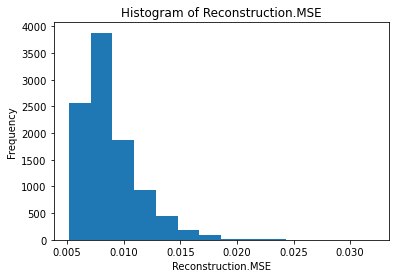

In [29]:
score_ae.hist()

In [30]:
score_ae.quantile()

Probs,Reconstruction.MSEQuantiles
0.01,0.0029367
0.1,0.00356752
0.25,0.00417168
0.333,0.00449456
0.5,0.00523841
0.667,0.00632185
0.75,0.00704375
0.9,0.00936319
0.99,0.0143135


### 精度検証

In [54]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd
import numpy as np

In [69]:
# pandas.DataFrameへ変換（ローカル環境上のオブジェクトにロード）
df_res = score_ae['Reconstruction.MSE'].as_data_frame()
df_res['Actual_Label'] = y_test                                     # 0,1,2,..,9の元々の正解ラベル
df_res['Actual_AnomalyFlag'] = y_test_anomaly       # 0,1が異常（1）、0,1以外が正常（0）とするフラグ

df_res.head()

,Reconstruction.MSE,Actual_Label,Actual_AnomalyFlag
0,0.003750,7,0
1,0.009301,2,0
2,0.003663,1,1
3,0.005877,0,1
4,0.004605,4,0


In [70]:
actual = df_res['Actual_AnomalyFlag']   # 実測
anomaly_score = df_res['Reconstruction.MSE']  # 予測

[]

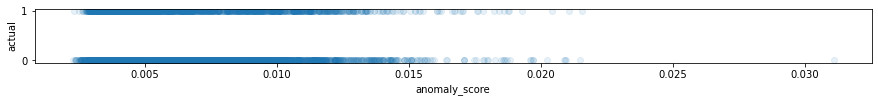

In [71]:
# 予実プロット
plt.figure(figsize=[15,1])
plt.scatter(anomaly_score, actual, alpha=0.1)
plt.xlabel('anomaly_score')
plt.ylabel('actual')
plt.plot()

In [72]:
fpr, tpr, threshold = roc_curve(actual, anomaly_score)

In [73]:
# AUC
auc_value = auc(fpr, tpr)
auc_value

0.43004285900601286

[]

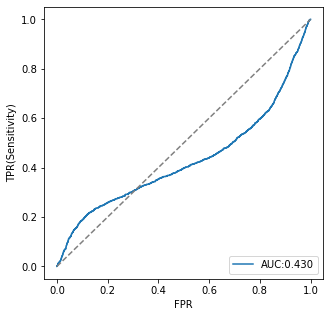

In [74]:
# ROC曲線
plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, label="AUC:{:.3f}".format(auc_value))
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), '--', color='gray')    # 斜め４５度線
plt.xlabel('FPR')
plt.ylabel('TPR(Sensitivity)')
plt.legend(loc='lower right')
plt.plot()